In [1]:
import pandas as pd 

df_annual = pd.read_csv("../data/co2_annmean_mlo.csv", skiprows=43)
df_annual.head()

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


In [2]:
df_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    64 non-null     int64  
 1   mean    64 non-null     float64
 2   unc     64 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6 KB


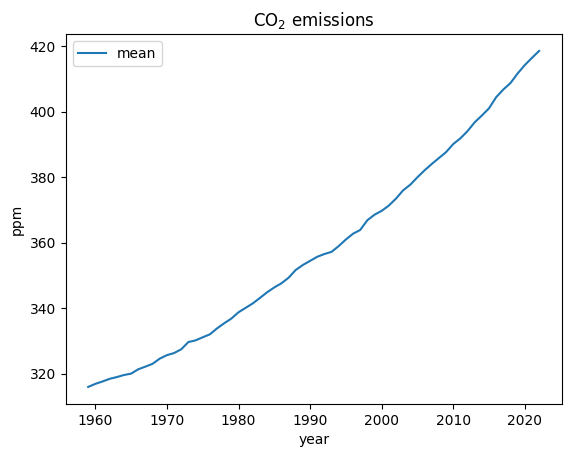

In [3]:
df_annual.plot(x = "year", y="mean", ylabel="ppm", title="CO$_2$ emissions");


In [4]:
df_country = pd.read_html("https://www.worldometers.info/co2-emissions/co2-emissions-by-country/", index_col=0)[0]

df_country.head()

,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,Share of world
#,,,,,,
1,China,10432751400,-0.28%,1401889681,7.44,29.18%
2,United States,5011686600,-2.01%,327210198,15.32,14.02%
3,India,2533638100,4.71%,1338636340,1.89,7.09%
4,Russia,1661899300,-2.13%,145109157,11.45,4.65%
5,Japan,1239592060,-1.21%,126993857,9.76,3.47%


In [5]:
df_country.info()


<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 1 to 209
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      209 non-null    object 
 1   CO2 Emissions  (tons, 2016)  209 non-null    int64  
 2   1 Year  Change               209 non-null    object 
 3   Population  (2016)           209 non-null    int64  
 4   Per  capita                  209 non-null    float64
 5   Share  of world              209 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 11.4+ KB


In [6]:
df_country = df_country.rename({"Share  of world": "World percentage"}, axis=1)
df_country.head()

,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,World percentage
#,,,,,,
1,China,10432751400,-0.28%,1401889681,7.44,29.18%
2,United States,5011686600,-2.01%,327210198,15.32,14.02%
3,India,2533638100,4.71%,1338636340,1.89,7.09%
4,Russia,1661899300,-2.13%,145109157,11.45,4.65%
5,Japan,1239592060,-1.21%,126993857,9.76,3.47%


In [7]:
df_country["World percentage"] = df_country["World percentage"].str[:-1].astype(float)
df_country.head()

,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,World percentage
#,,,,,,
1,China,10432751400,-0.28%,1401889681,7.44,29.18
2,United States,5011686600,-2.01%,327210198,15.32,14.02
3,India,2533638100,4.71%,1338636340,1.89,7.09
4,Russia,1661899300,-2.13%,145109157,11.45,4.65
5,Japan,1239592060,-1.21%,126993857,9.76,3.47


<Axes: xlabel='Country'>

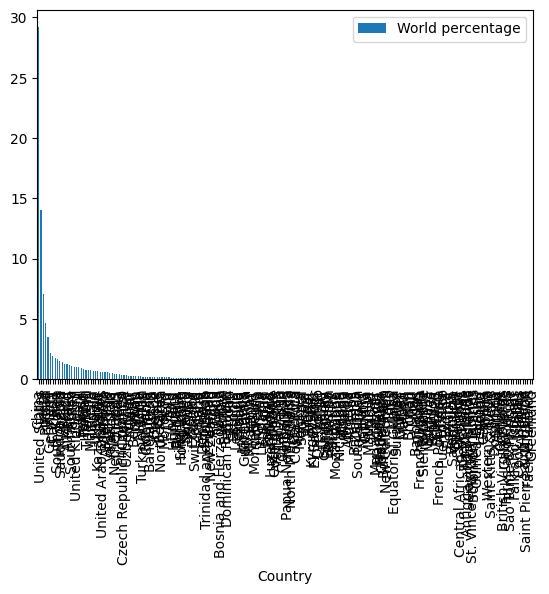

In [8]:
df_country.plot(kind="bar", x = "Country", y="World percentage")


<Axes: xlabel='Country'>

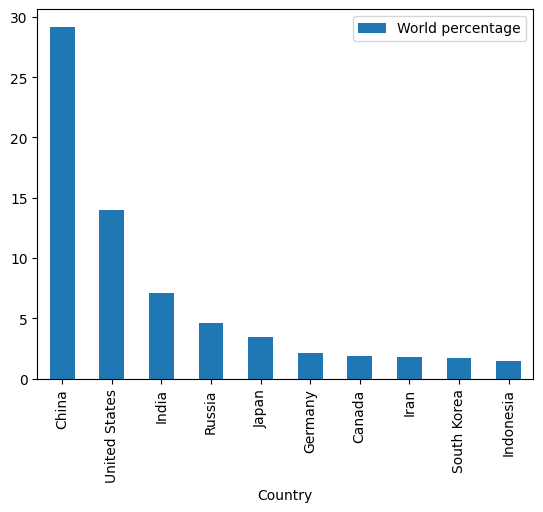

In [9]:
df_country.head(10).plot(kind="bar", x="Country", y="World percentage")


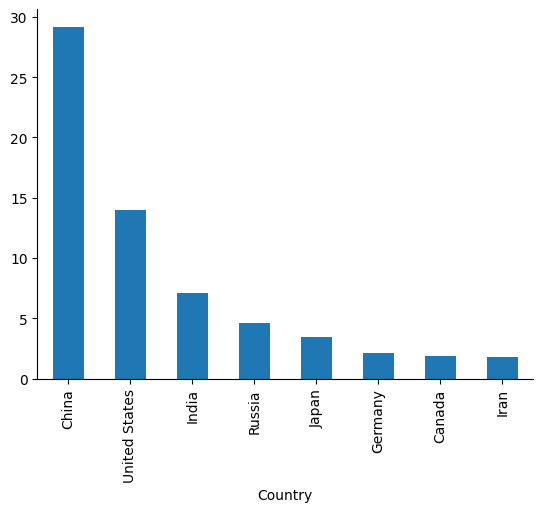

In [10]:
ax_percentage = df_country.head(8).plot(kind="bar", x="Country", y="World percentage")
ax_percentage.spines["top"].set_visible(False)
ax_percentage.spines["right"].set_visible(False)
ax_percentage.legend().set_visible(False)

##

## attention 

- highlight important aspects of your visual 
- guide user attention
- use colors sparingly 

## Contrast

- axis info -> low contrast
- important info -> high contrast 

## Descriptive titles and labes


Text(0.5, 1.0, 'The annual mean of co$_2$ emissions mesuared in Mauna loa has increases')

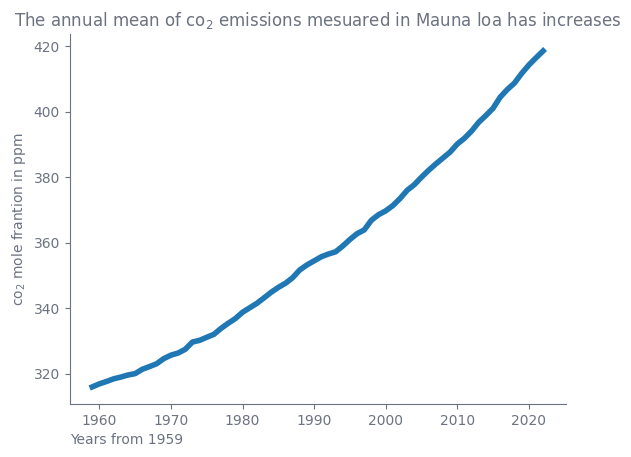

In [28]:
ax_annual = df_annual.plot(x="year", y="mean", linewidth = 4)

GRAY1 = "#6b7280"

#Remove clutter
ax_annual.spines["top"].set_visible(False)
ax_annual.spines["right"].set_visible(False)
ax_annual.legend().set_visible(False)

# contrast for attention

ax_annual.spines["left"].set_color(GRAY1)
ax_annual.spines["bottom"].set_color(GRAY1)
ax_annual.tick_params(colors=GRAY1)

ax_annual.set_xlabel("Years from 1959", loc="left", color=GRAY1)
ax_annual.set_ylabel("co$_2$ mole frantion in ppm", color=GRAY1)
ax_annual.set_title("The annual mean of co$_2$ emissions mesuared in Mauna loa has increases", color=GRAY1)

['#be123c', '#be123c', '#be123c', '#4b5563', '#4b5563', '#4b5563', '#4b5563', '#4b5563']


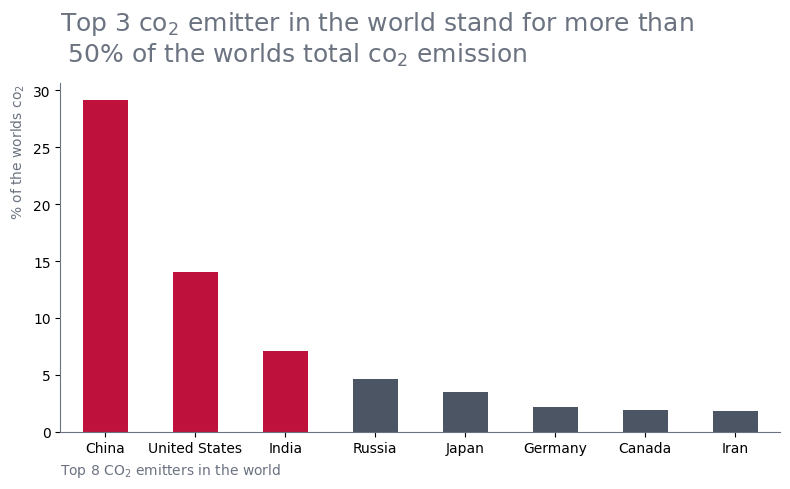

In [51]:
number_countries = 8
top_emitters = 3
red, gray = "#be123c", "#4b5563"
colors = [red]*top_emitters + [gray] * (number_countries-top_emitters)

print(colors)



ax_country = df_country.head(number_countries).plot(kind="bar", x="Country", y="World percentage", color=colors, rot=0)

ax_country.set_xlabel("Top 8 CO$_2$ emitters in the world", loc="left", color=GRAY1)
ax_country.set_ylabel("% of the worlds co$_2$", loc="top", color=GRAY1)

ax_country.spines["top"].set_visible(False)
ax_country.spines["right"].set_visible(False)
ax_country.legend().set_visible(False)
# ccountryt for attecountry
ax_country.spines["left"].set_color(GRAY1)
ax_country.spines["bottom"].set_color(GRAY1)

ax_country.set_title("Top 3 co$_2$ emitter in the world stand for more than\n 50% of the worlds total co$_2$ emission",
                      loc="left",
                      pad=15,
                      color=GRAY1,
                      fontsize=18,
                     )

fig = ax_country.get_figure()
fig.set_size_inches(8,5)
fig.tight_layout()